In [175]:
import math
from sympy import *
init_printing(use_unicode=True)
x, y, z, l =symbols('x y z l')

In [176]:
from icecream import ic

In [177]:
# def getFuncAndTaylorPlots(func, taylor, rangeX=(-5, 5)):
#     plt1 = plot(func, (x, rangeX[0], rangeX[1]), show=False, line_color='blue', xlabel='x', ylabel='y', legend=True, title="Wykres funkcji i jej N-tego przyblizenia", label='f(x)')
#     plt2 = plot(taylor, (x, rangeX[0], rangeX[1]), show=False, line_color='red', label='taylor')
#     plt1.append(plt2[0])
#     plt1.show()
#     return plt1

def getPlots(funcsWithPlotParameters, title, rangeX=(-5, 5)):
    plots = plot(show=False, xlabel='x', ylabel='y', legend=True, title=title)
    for fp in funcsWithPlotParameters:
        p = plot(fp['func'], (x, rangeX[0], rangeX[1]), show=False, line_color=fp['color'], label=fp['label'])
        plots.append(p[0])
    plots.show()
    return plots

In [178]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    skladowe = []
    szeregTaylora = 0
    for n in range(1, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX = pochodna.subs(x, x0)
        skladowa = pochodnaX / math.factorial(n) * ((x - x0)**n)
        ic(pochodna, pochodnaX, skladowa)
        if skladowa:
            skladowe.append(skladowa)
        szeregTaylora += skladowa
    # wykreFunkcjiITailora = getFuncAndTaylorPlots(func, szeregTaylora, (x0-5, x0+5))
    wykreFunkcjiITailora = getPlots([{'func':func, 'color':"blue", 'label':"f(x)"}, {'func':szeregTaylora, 'color':"red", 'label':"taylor"}], "Wykres funkcji i jej N-tego przyblizenia")
    return skladowe, szeregTaylora, wykreFunkcjiITailora

ic| func: sin(x), Nn: 14, x0: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**3/6
ic| pochodna: sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x**5/120
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**7/5040
ic| pochodna: sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x**9/362880
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**11/39916800
ic| pochodna: sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x**13/6227020800
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0


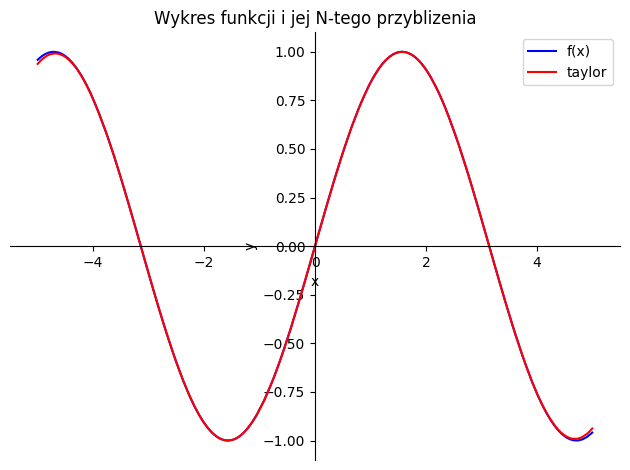

[x, -x**3/6, x**5/120, -x**7/5040, x**9/362880, -x**11/39916800, x**13/6227020800]
x**13/6227020800 - x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


In [179]:
t1Func = sin(x)
w1, w2, w3 = t1(t1Func, 14, 0)
print(w1)
print(w2)